# Data Processing 

## Importing libraries and reading the data

In [11]:
import numpy as np 
import pandas as pd 
import pyarrow

import ast

import matplotlib.pyplot as plt
import seaborn as sns 

pd.set_option('display.max_columns', None)

In [21]:
df_movies = pd.read_parquet('../Data processing/data_IMDB_TMDB_join.parquet', engine='pyarrow')
df_movies.head()

,tconst,averageRating_IMDB,numVotes_IMDB,originalTitle,isAdult,release_year,runtimeMinutes,genres,director_name,primaryProfession,tmdb_id,original_language,popularity_TMDB,overview,budget,country,production_companies,revenue,vote_average_TMDB,vote_count_TMDB,cast
0,tt0000009,5.2,231,Miss Jerry,0,1894,45.0,Romance,Alexander Black,"director,writer,cinematographer",356151.0,en,0.2544,The adventures of a female reporter in the 1890s.,0.0,[US],['Alexander Black Photoplays'],0.0,4.5,4.0,"[{'name': 'Blanche Bayliss', 'gender': 0, 'pop..."
1,tt0000147,5.3,578,The Corbett-Fitzsimmons Fight,0,1897,100.0,"Documentary,News,Sport",Enoch J. Rector,"director,cinematographer,editor",147610.0,en,0.0511,"This legendary fight was filmed on March 17, 1...",0.0,[US],['Veriscope Company'],0.0,5.3,27.0,"[{'name': 'James J. Corbett', 'gender': 2, 'po..."
2,tt0000574,6.0,1039,The Story of the Kelly Gang,0,1906,70.0,"Action,Adventure,Biography",Charles Tait,"director,writer",20105.0,en,0.1518,Just as Galeen and Wegener's Der Golem (1915) ...,0.0,[AU],"['Johnson and Gibson', 'J. & N. Tait']",0.0,5.2,40.0,"[{'name': 'Elizabeth Tait', 'gender': 0, 'pop'..."
3,tt0000591,4.8,36,L'enfant prodigue,0,1907,90.0,Drama,Michel Carré,"director,writer,actor",396922.0,fr,0.0632,The first feature-length motion picture produc...,0.0,[FR],['Pathé Frères'],0.0,2.0,1.0,"[{'name': 'Georges Wague', 'gender': 2, 'pop':..."
4,tt0001285,5.2,73,The Life of Moses,0,1909,50.0,"Biography,Drama,Family",J. Stuart Blackton,"director,producer,miscellaneous",284952.0,en,0.9570,Released in five parts (The Persecution of the...,0.0,[US],['Vitagraph Company of America'],0.0,1.0,1.0,"[{'name': 'Pat Hartigan', 'gender': 2, 'pop': ..."


## Feature Exploration

In [22]:
df_movies.shape

(265654, 21)

In [23]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265654 entries, 0 to 265653
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   tconst                265654 non-null  object 
 1   averageRating_IMDB    265654 non-null  float64
 2   numVotes_IMDB         265654 non-null  int64  
 3   originalTitle         265654 non-null  object 
 4   isAdult               265654 non-null  int64  
 5   release_year          265654 non-null  Int64  
 6   runtimeMinutes        265654 non-null  float64
 7   genres                265654 non-null  object 
 8   director_name         265654 non-null  object 
 9   primaryProfession     265654 non-null  object 
 10  tmdb_id               238600 non-null  float64
 11  original_language     238600 non-null  object 
 12  popularity_TMDB       238600 non-null  float64
 13  overview              238600 non-null  object 
 14  budget                238600 non-null  float64
 15  

In [24]:
# Convert strings to lists 
df_movies['genres'] = df_movies['genres'].str.split(',')
df_movies['primaryProfession'] = df_movies['primaryProfession'].str.split(',')

df_movies

,tconst,averageRating_IMDB,numVotes_IMDB,originalTitle,isAdult,release_year,runtimeMinutes,genres,director_name,primaryProfession,tmdb_id,original_language,popularity_TMDB,overview,budget,country,production_companies,revenue,vote_average_TMDB,vote_count_TMDB,cast
0,tt0000009,5.2,231,Miss Jerry,0,1894,45.0,[Romance],Alexander Black,"[director, writer, cinematographer]",356151.0,en,0.2544,The adventures of a female reporter in the 1890s.,0.0,[US],['Alexander Black Photoplays'],0.0,4.500,4.0,"[{'name': 'Blanche Bayliss', 'gender': 0, 'pop..."
1,tt0000147,5.3,578,The Corbett-Fitzsimmons Fight,0,1897,100.0,"[Documentary, News, Sport]",Enoch J. Rector,"[director, cinematographer, editor]",147610.0,en,0.0511,"This legendary fight was filmed on March 17, 1...",0.0,[US],['Veriscope Company'],0.0,5.300,27.0,"[{'name': 'James J. Corbett', 'gender': 2, 'po..."
2,tt0000574,6.0,1039,The Story of the Kelly Gang,0,1906,70.0,"[Action, Adventure, Biography]",Charles Tait,"[director, writer]",20105.0,en,0.1518,Just as Galeen and Wegener's Der Golem (1915) ...,0.0,[AU],"['Johnson and Gibson', 'J. & N. Tait']",0.0,5.200,40.0,"[{'name': 'Elizabeth Tait', 'gender': 0, 'pop'..."
3,tt0000591,4.8,36,L'enfant prodigue,0,1907,90.0,[Drama],Michel Carré,"[director, writer, actor]",396922.0,fr,0.0632,The first feature-length motion picture produc...,0.0,[FR],['Pathé Frères'],0.0,2.000,1.0,"[{'name': 'Georges Wague', 'gender': 2, 'pop':..."
4,tt0001285,5.2,73,The Life of Moses,0,1909,50.0,"[Biography, Drama, Family]",J. Stuart Blackton,"[director, producer, miscellaneous]",284952.0,en,0.9570,Released in five parts (The Persecution of the...,0.0,[US],['Vitagraph Company of America'],0.0,1.000,1.0,"[{'name': 'Pat Hartigan', 'gender': 2, 'pop': ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265649,tt9916190,3.6,266,Safeguard,0,2020,95.0,"[Action, Adventure, Thriller]",Fraser Precious,"[producer, director, writer]",633490.0,en,4.4258,When a Japanese restaurant is extorted by the ...,0.0,"[US, GB]",[],0.0,5.200,4.0,"[{'name': 'Akie Kotabe', 'gender': 2, 'pop': 0..."
265650,tt9916270,5.8,1530,Il talento del calabrone,0,2020,84.0,[Thriller],Giacomo Cimini,"[director, visual_effects, writer]",670203.0,it,1.2333,"Dj Steph is a young radio deejay on the rise, ...",0.0,[IT],"['PACO Cinematografica', 'Eagle Pictures']",0.0,6.411,437.0,"[{'name': 'Sergio Castellitto', 'gender': 2, '..."
265651,tt9916362,6.4,6167,Akelarre,0,2020,92.0,"[Drama, History, Horror]",Pablo Agüero,"[director, writer, producer]",655187.0,eu,2.4468,"French Basque Country, year 1609. The men of a...",0.0,[ES],"['INCAA', 'La Fidèle Production', 'Lamia Produ...",0.0,6.700,306.0,"[{'name': 'Àlex Brendemühl', 'gender': 2, 'pop..."
265652,tt9916538,7.6,12,Kuambil Lagi Hatiku,0,2019,123.0,[Drama],Azhar Kinoi Lubis,"[director, assistant_director, actor]",586983.0,id,2.1100,"Agra City, India, will be the witness to the m...",0.0,[ID],"['Perusahaan Film Negara', 'Taman Wisata Candi...",0.0,0.000,0.0,"[{'name': 'Lala Karmela', 'gender': 1, 'pop': ..."


### Years

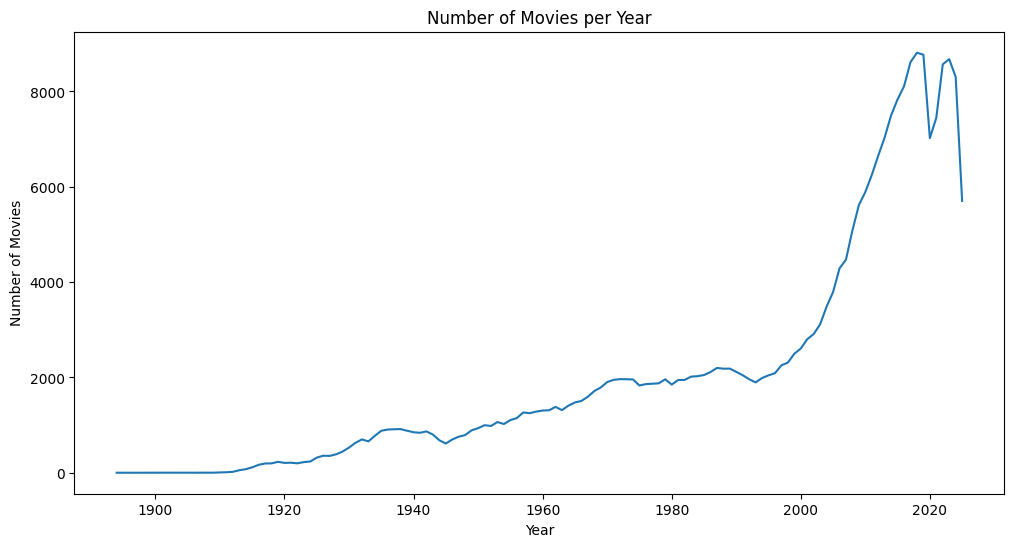

In [27]:
# Movies per year
movies_per_year = df_movies['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.title("Number of Movies per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

### Genres

In [29]:
# Now explode
df_exploded_genres = df_movies.explode('genres')

# Check the result
print(df_exploded_genres[['originalTitle','genres']].head(10))

                   originalTitle       genres
0                     Miss Jerry      Romance
1  The Corbett-Fitzsimmons Fight  Documentary
1  The Corbett-Fitzsimmons Fight         News
1  The Corbett-Fitzsimmons Fight        Sport
2    The Story of the Kelly Gang       Action
2    The Story of the Kelly Gang    Adventure
2    The Story of the Kelly Gang    Biography
3              L'enfant prodigue        Drama
4              The Life of Moses    Biography
4              The Life of Moses        Drama


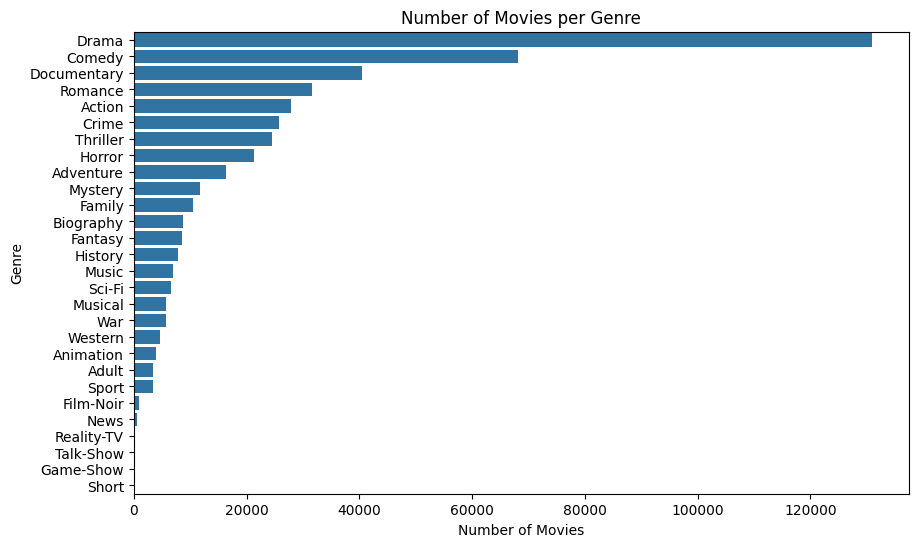

In [30]:
genre_counts = df_exploded_genres['genres'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Number of Movies per Genre")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

### Countries

In [33]:
# Explode the df
df_exploded_country = df_movies.explode('country')

# Check the result
print(df_exploded_country[['originalTitle','country']].head(10))

                             originalTitle country
0                               Miss Jerry      US
1            The Corbett-Fitzsimmons Fight      US
2              The Story of the Kelly Gang      AU
3                        L'enfant prodigue      FR
4                        The Life of Moses      US
5                  The Battle of Trafalgar      US
6                            Ekspeditricen      DK
7  Les misérables - Époque 1: Jean Valjean      US
8                              Oedipus Rex      GB
9                           Den sorte drøm      DK


In [34]:
# Removing outliers 
country_counts = df_exploded_country['country'].value_counts()
country_counts_filtered = country_counts[country_counts > 5]
country_counts_filtered



country
US    94189
IN    14503
FR    14222
GB    11696
DE    10225
      ...  
RE        6
CV        6
BB        6
GW        6
MQ        6
Name: count, Length: 161, dtype: int64

ARRET DE MODIFICATION AVEC NOUVEAU DATAFRAME

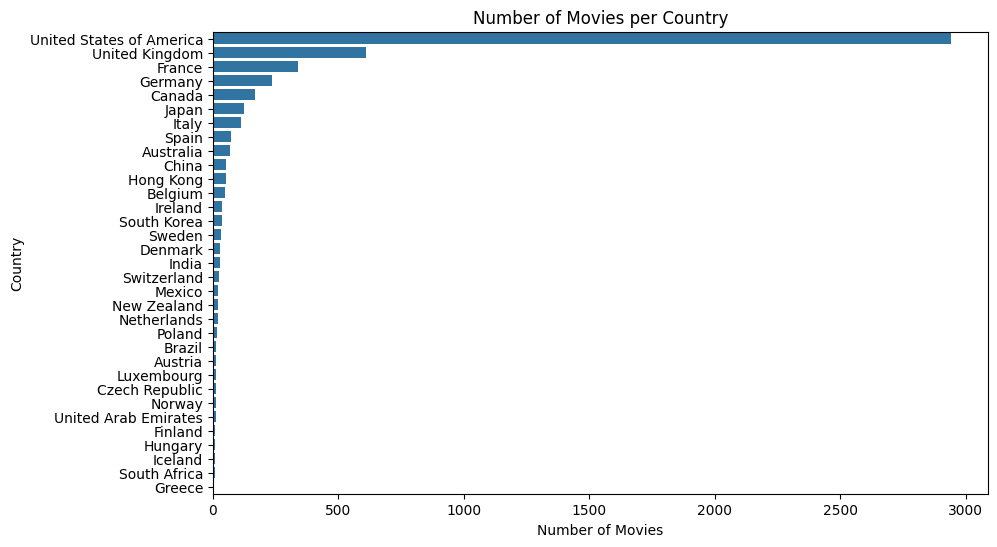

In [79]:
country_counts = df_exploded_country['country'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=country_counts_filtered.values, y=country_counts_filtered.index)
plt.title("Number of Movies per Country")
plt.xlabel("Number of Movies")
plt.ylabel("Country")
plt.show()

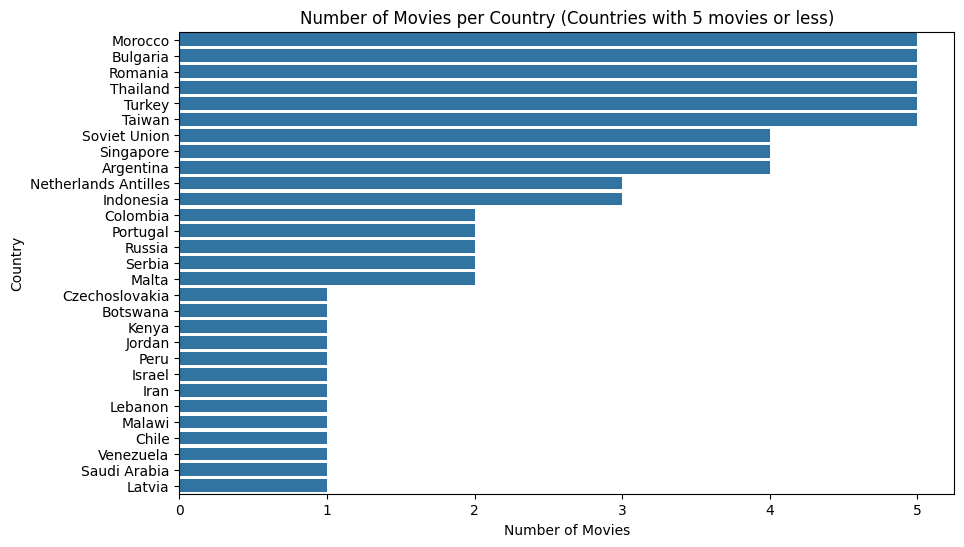

In [80]:
# Plotting the outliers 
country_counts_outliers = country_counts[country_counts < 6]

plt.figure(figsize=(10,6))
sns.barplot(x=country_counts_outliers.values, y=country_counts_outliers.index)
plt.title("Number of Movies per Country (Countries with 5 movies or less)")
plt.xlabel("Number of Movies")
plt.ylabel("Country")
plt.show()


### Cast

In [87]:
# Explode df
df_exploded_cast = df_movies.explode('cast')

# Check the result
print(df_exploded_cast[['title','cast']].head(10))

# Count movies per actor 
cast_counts = df_exploded_cast['cast'].value_counts()

              title                cast
0  Sunset Boulevard      William Holden
0  Sunset Boulevard      Gloria Swanson
0  Sunset Boulevard  Erich von Stroheim
0  Sunset Boulevard         Nancy Olson
0  Sunset Boulevard          Fred Clark
1     All About Eve         Bette Davis
1     All About Eve         Anne Baxter
1     All About Eve      George Sanders
1     All About Eve        Celeste Holm
1     All About Eve        Gary Merrill


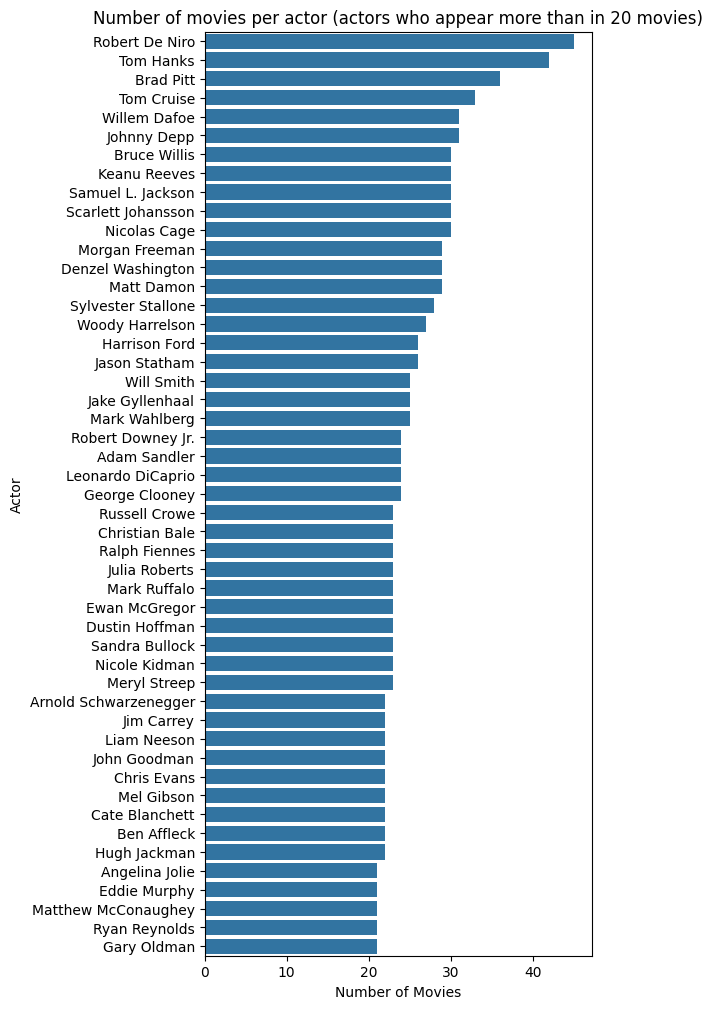

In [95]:
# Plot the actors who appear in the biggest number of movies 
top_actors = cast_counts[cast_counts > 20]

plt.figure(figsize=(5,12))
sns.barplot(x=top_actors.values, y=top_actors.index)
plt.title("Number of movies per actor (actors who appear more than in 20 movies)")
plt.xlabel("Number of Movies")
plt.ylabel("Actor")
plt.show()



### Directors

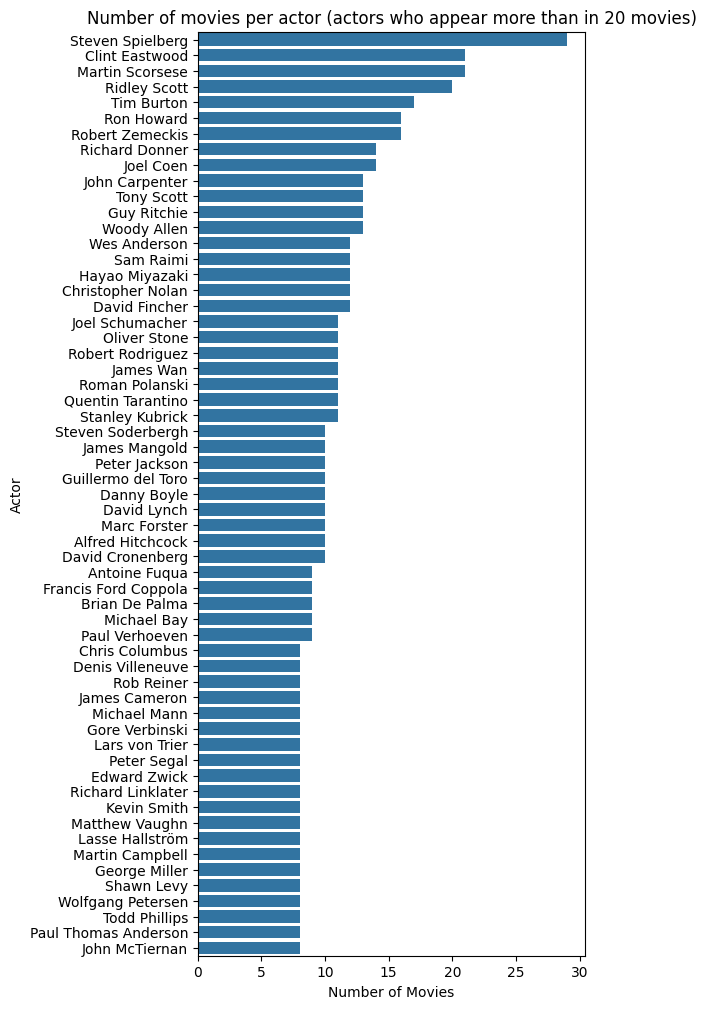

In [102]:
director_counts = df_movies['director'].value_counts()
top_directors = director_counts[director_counts>7]

plt.figure(figsize=(5,12))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Number of movies per actor (actors who appear more than in 20 movies)")
plt.xlabel("Number of Movies")
plt.ylabel("Actor")
plt.show()

## Overview Analysis (NLP)